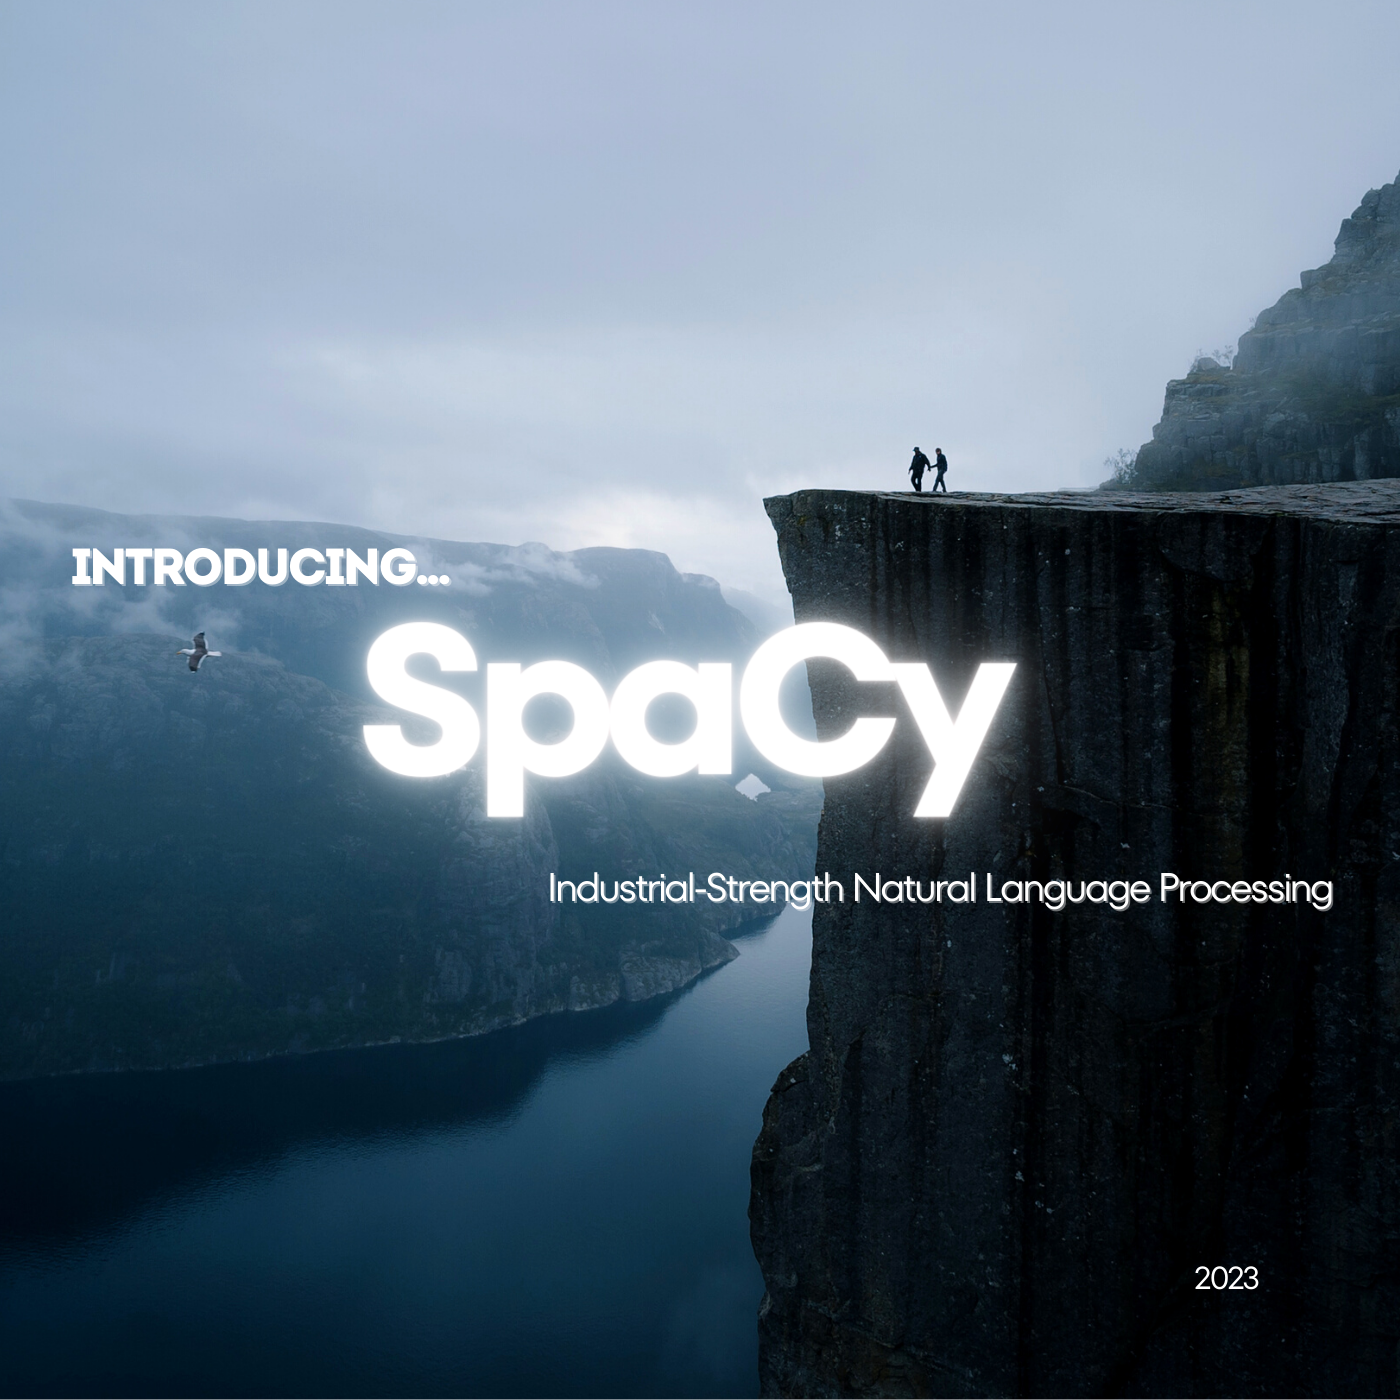

<div style='text-align: center;'>
  <h1>World of SpaCy</h1>
</div>

---

## What is SpaCy???

**The aim of this notebook is to quickly introduce reader to NLP library SpaCy.**

**It is a powerful and efficient NLP library that simplifies natural language processing tasks. It's designed to be user-friendly, with pre-trained models for various languages, allowing you to focus on your specific NLP tasks without getting bogged down in the complexities of linguistic processing.**

**Usually for NLP people use NLTK but spacy is much easier to understand and learn, also you may not even need something as complex as NLTK for your task and SpaCy can do just fine, it's like sklearn in ML**

---

## What's NLP???

NLP or Natural language processing sounds quite fancy. It is a subfield of Artificial Intelligence which uses ML algorithms and techniques to understand natural language data. In simple terms it is a way for computer to not simply think of some text as bunch of strings that don't really mean much but to see a bigger picture, understand words, parts of speech, understand their relation.

## But how do we install it?

Using `pip` of course

In [72]:
!pip install -U spacy

But we also need to load a model, creating a blank one is not the best option for beginners

In [73]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 40.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


And of couse the most `import`ant part

In [74]:
import spacy

First of all let's load English language model it has a unique **Language** class and it is used to process a text and turn it into a **Doc** object.

In [75]:
nlp = spacy.load('en_core_web_sm')

Now we can process a simple sentence using our language model turning it into a Doc

## Doc

It is a container for accessing linguistic annotation, basically `Doc` is an object that contains processed text

In [76]:
doc = nlp("Why couldn't the bicycle stand up by itself? It was two tired.")

In [77]:
doc

Why couldn't the bicycle stand up by itself? It was two tired.

In [78]:
type(nlp(doc))

spacy.tokens.doc.Doc

What does `nlp` do? It is splitting text into different kind of objects

In [79]:
print([t for t in nlp(doc)])

[Why, could, n't, the, bicycle, stand, up, by, itself, ?, It, was, two, tired, .]


But split does the same thing right? <br>
Not exactly, split is not as flexible as Language model, because it can detect punctuation, apostrohes, conjunctions.

What does `Doc` consist of?  (You can get different words in `Doc` by using its index)<br>

In [80]:
doc = nlp("Why couldn't the bicycle stand up by itself? It was two tired.")
type(doc[0])

spacy.tokens.token.Token

It contains a sequence of `Tokens`

## Tokens

`Token` is another object that is usually a word or a punctuation symbol (lexical type). Each token has  lots of attributes, main ones are: **Part of speech** and **Dependency**(which words it's dependent on and how) and here are some more...

Token index (not char index)

In [81]:
token.i

5

You can iterate using index

In [82]:
doc[token.i + 1]

up

Token converted into str

In [83]:
token.text

'up'

Token dependency (int and str)

In [84]:
token.dep, token.dep_

(444, 'prt')

Token PartOfSpeech (int and str)

In [85]:
token.pos, token.pos_

(85, 'ADP')

In [86]:
for t in doc:
    print(f"{t.i:<3}{t.text:<12}{t.pos_:<10}{t.dep_:<10}")

0  Why         SCONJ     advmod    
1  could       AUX       aux       
2  n't         PART      neg       
3  the         DET       det       
4  bicycle     NOUN      nsubj     
5  stand       VERB      ROOT      
6  up          ADP       prt       
7  by          ADP       prep      
8  itself      PRON      pobj      
9  ?           PUNCT     punct     
10 It          PRON      nsubj     
11 was         AUX       ROOT      
12 two         NUM       attr      
13 tired       ADJ       amod      
14 .           PUNCT     punct     


## Span

By the way, Doc slice is a different object called `Span` (we are iterating tokens, not characters). `Span` consists of `tokens`

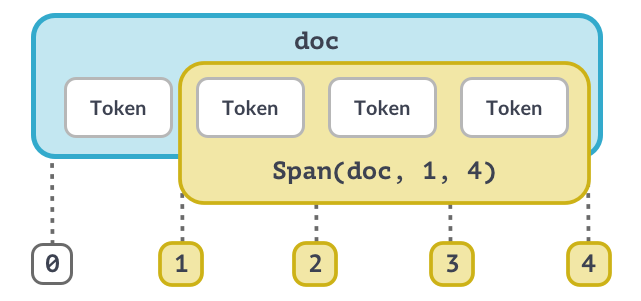

In [87]:
type(doc[0:2])

spacy.tokens.span.Span

In [88]:
doc[0:2]

Why could

It also has a multitude of attributes, for example:

`.start` - Index of the first token in span <br>
`.end`   - Index of the first token after the span<br>
`.label` - Label of the Span (used for Entities, more on that later) (int)<br>
`.label_`- Label of the Span (used for Entities, more on that later) (str)<br>
`.vector`- Vector representation of the Span (numpy ndarray)

Now it's time to create some beatiful diagrams with the help of **displacy**

In [89]:
from spacy import displacy

In [90]:
displacy.render(doc)

Look how gorgeous it is, it shows how each different token is affected by the others and which part of speach it is

If you are struggling to understand what some of these words mean you can always use **spacy.expain**

In [91]:
spacy.explain("AUX")

'auxiliary'

In [92]:
spacy.explain("uc")

'unit component'

## Entities


Our nlp model can also predict Named Entities (names, proper nouns, etc.)

In [93]:
doc = nlp("Ben really wanted a new Apple IPhone, but unfortunately he already sold his kidney for a $1 thousand to buy new Samsung.")

Let's see what did the model recognise and make it beautiful using `displacy`

In [94]:
doc.ents

(Ben, Apple, $1 thousand, Samsung)

In [95]:
displacy.render(doc, style = 'ent')

Entity is a Span object so it has same attributes:

In [96]:
for entity in doc.ents:
    print(f"{entity.text:<16}{entity.label_:<6}")

Ben             PERSON
Apple           ORG   
$1 thousand     MONEY 
Samsung         ORG   


As you can see it didn't recognise word "IPhone", because models aren't perfect, like people they sometimes make mistakes.

Now let's fix that

## Matcher

In [97]:
from spacy.matcher import Matcher

The `Matcher` lets you find any number of words using description of their tokens

Initialising matcher using vocabulary of the model we are using

In [98]:
matcher = Matcher(nlp.vocab)

To use `Matcher` first we need some patterns of tokens we need it to recognise (Pattern is just a list of dicts describing tokens). For example lets teach our model to recognise word "iphone" no matter the case

In [99]:
pattern = [{"LOWER" : "iphone"}]

Now we add the pattern to the matcher and process same sentence again

In [100]:
matcher.add("iphone_pat", [pattern])
doc = nlp("Ben really wanted a new Apple IPhone, but unfortunately he already sold his kidney for a $1 thousand to buy new Samsung.")
matches = matcher(doc)
print(matches)

[(4649214705606169865, 6, 7)]


Each match has `match_id`: hash value of the pattern name, `start`: start index of matched span, `end`: end index of matched span

In [101]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

IPhone


`Matcher` has many different attributes, some of them I will show below but if you want the whole list you can find it [here](https://spacy.io/api/matcher)

`LEMMA` - token's lemma <br>
`POS`   - token's part of speech <br>
`DEP`   - token's dependency <br>
`LOWER` - lower case form of token <br>
`IS_DIGIT` - is token a digit <br>
`IS_PUNCT` - is token a punctuation <br>
`TEXT`  - exact text of a token <br>
`OP`    - operator which determines how often should found token match our token pattern <br>
`{"OP": "!"}`	Negation: match 0 times <br>
`{"OP": "?"}`	Optional: match 0 or 1 times<br>
`{"OP": "+"}`	Match 1 or more times<br>
`{"OP": "*"}`	Match 0 or more times

Let's try something more complex

In [102]:
doc = nlp("Yesterday she wanted to buy a dog, today she wants a cat, tommorow she will want something else, I just hope it is not a tiger.")

pattern = [{"LEMMA" : "want", "POS": "VERB"}, {"POS": {"IN": ["DET", "PART"]}, "OP":"?"}, {"POS":{"IN": ["NOUN", "PRON", "VERB"]}}]
matcher.add("wants_pat", [pattern])
matches = matcher(doc)


for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

wanted to buy
wants a cat
want something


Now we can find any types of tokens we want, but if you want to match sequences of tokens you can use `PhraseMatcher` it is more efficient and faster than `Matcger`, so if you need to match  large lists it is better to use `PhraseMatcher`,it works similar to a regular `Matcher`. You can read about it [here](https://spacy.io/api/phrasematcher) 

## Vocab

We saw earlier that `Matcher` used `nlp.vocab`, but what is this exactly?<br>


>`Vocab` is a storage for vocabulary(surprise, surprise)  and other data shared across a language such as hash values, strings, etc.

SpaCy encodes all strings to hash values, strings are only stored once in the `StringStore` via `nlp.vocab.strings`, you can lookup both through each other (string using it's hash value and hash value through string) 

In [103]:
doc = nlp("When the days are cold and the cards are fold...")
print("hash_with_nlp:", nlp.vocab.strings["cold"])
print("hash_with_doc:", doc.vocab.strings["cold"])

hash_with_nlp: 3117178197819627377
hash_with_doc: 3117178197819627377


In [104]:
print("string:", nlp.vocab.strings[3117178197819627377])

string: cold


## Lexeme

> `Lexeme` is a word type it is not a token (no `pos`, `dep`, `lemma`), it's just an entry in vocabulary

`Lexeme` contains context-independent information about a word. Here are some of it's attributes: <br>
- `.text` = word text <br>
- `.orth` = word hash <br>
- `.is_digit` = is a word a digit <br>
and other [lexical attributes](https://spacy.io/api/lexeme)

In [105]:
lexeme = nlp.vocab["days"]
print(lexeme.text, lexeme.orth, lexeme.is_digit)

days 18443948407981750281 False


Here is how it works: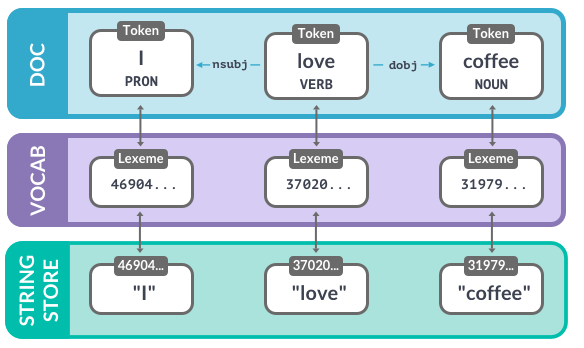

Now lets look into semantic similarity of `tokens`, `spans` and `docs`, we are learning nlp library after all.

First we need to understand how we can compare words, some sets of charaters. To do that SpaCy uses word vectors

Unfortunately current model does not support word vectors, so we need to switch to a bigger one

In [106]:
!python -m spacy download en_core_web_md

     --------------------------------------- 42.8/42.8 MB 38.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [107]:
nlp = spacy.load('en_core_web_md')

## Word vectors

>`Words vectors` are multi-dimensional meaning representation of words, so it's just another way to interpret words.  We can see word's vector using `.vector` attribute

In [108]:
doc = nlp("Once there was an explosion, an explosion that gave life to a world as we know it...")
print(doc[5].vector)

[ -3.3899    -4.7034    -0.56101    1.2291     4.3298    -1.0775
  -1.3006     8.7939    -0.16669   -4.3738     2.3697     2.6438
  -5.4589     3.3491     4.0331     5.1368    -3.0016     4.3627
  -3.1921    -4.6624     6.065      1.0278    -2.302      2.6546
  -1.9866    -0.21586   -4.6756    -4.2126     4.552      0.77829
  -2.3145    -5.2688    -0.83724    1.5414    -3.5657    -2.157
  -0.52113   -0.84522    0.10093   -2.5028     2.6867    -0.84121
  -0.37885   -0.56571    1.2562     6.6634    -1.9635    -2.7044
  -1.8338     1.4503    -5.5413     0.53806    1.909     -4.3604
  -0.86049    0.15564   -0.057504   2.5934    -1.0942    -4.2068
  -2.17      -3.2877     5.8554    -4.8534     7.503      6.1191
  -2.4823    -1.4451     3.8664     3.2508     0.709     -7.5112
  -3.982     -2.6949    -0.85431    3.454     -9.9227     0.5394
   1.2065     0.26367   -5.4167    -0.076605   2.0729     2.9393
   5.6086    -5.1065    -6.0031    -8.8691    -2.94      -4.2458
   1.2601    -0.52265   

## Similarity

We can compare `spans`, `docs` and `tokens` with each other

In [109]:
doc1 = nlp("Never gonna give you up")
doc2 = nlp("Never gonna let you down")

Comparing two `docs`:

In [110]:
print(doc1.similarity(doc2))

0.9013753421075477


Comparing two `tokens`:

In [111]:
print(doc1[5],doc2[5],'similarity:',doc1[5].similarity(doc2[5]))

up down similarity: 0.4724825620651245


Comparing `token` and `doc`:

In [112]:
token = doc1[5]
print(token)
print('similarity:',token.similarity(doc2))

up
similarity: 0.32262043483030195


Comparing `span` and `doc`:

In [113]:
span = doc1[0:3]
print(span)
print('similarity:',span.similarity(doc2))

Never gonna
similarity: 0.8930783330712915


Now lets talk about `SpaCy` pipeline

## Pipeline

All these data structures and functions are fun and all, but what actually happens when we call `nlp`?

To answer this question we can call `.pipeline` and see how exactly text is being processed and what modules does the model use or `.pipe_names`

In [114]:
doc = nlp("""Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry""")
print(nlp.pipeline)
print(nlp.pipe_names)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x0000022F47855EE0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x0000022F39CD9BE0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x0000022F464375F0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x0000022F474C8D00>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x0000022F518C28C0>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x0000022F498D6820>)]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


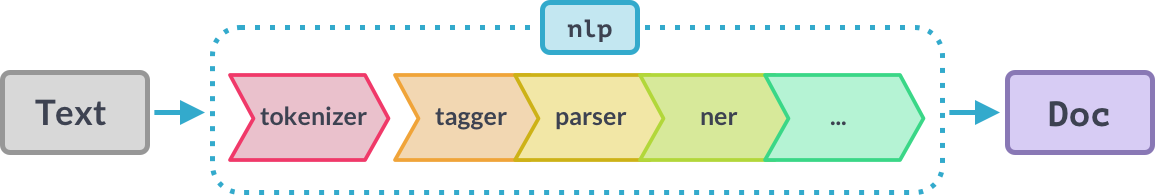

What any of these modules do?

`tokeniser` - Only module that can not be removed from the pipeline, it is responsible for tokenisation itself  
`tagger` -	Part-of-speech tagger  
`parser` -	Dependency parser  
`ner` -	Named entity recognizer  
`attributeruler` -	Set token attributes using matcher rules  
`lemmatizer` -	Determine the base forms of words using rules and lookups

>**DISCLAIMER** these modules differ depending on the model

So when we call `nlp` on some text
1) it is tokenised (split into `tokens`)  
2) each token is assigned its `part of speech`  
3) each token is assigned its `dependency`  
4) `matcher rules` are applied  
5) `base forms` of words are determined  
6) `entities` are found in the text  

You can edit pipelines of already existing models using `.add_pipe` (add new component) for more information refer [here](https://spacy.io/api)

Finally the picture is complete, lets look at `SpaCy` in all its glory

## Conclusion

Okay, now you know how spacy works, what data structures it uses, how to use it to find any kinds of words, phrases or sentences, how to determine similarity of different data structures and what SpaCy models actually do and how they do it, You can try to play with other different models, for example bigger ones like `en_core_web_trf` it sometimes is more accurate.

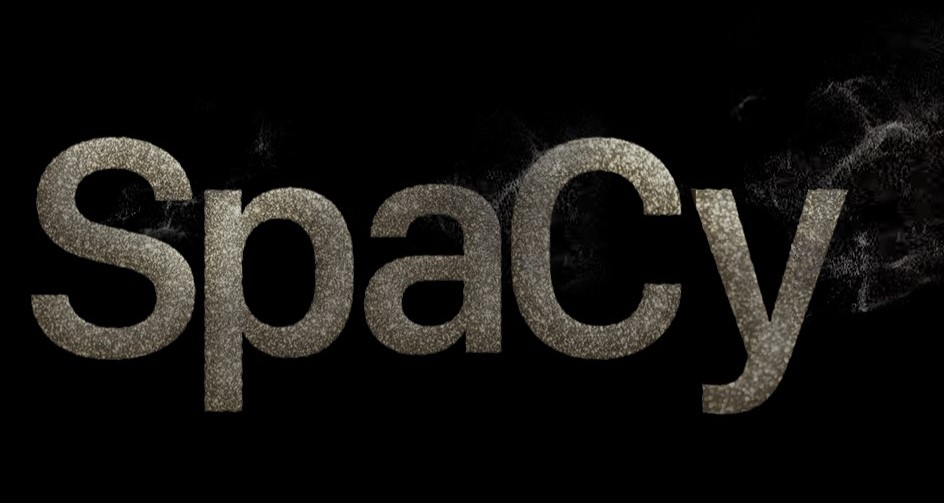